# Criptoanálisis:
##### Luis Dario Hinojosa
### Descripción:
Este trabajo consiste en la práctica de criptoanálisis basado en frecuencia. Se tiene un texto cifrado consistente en palabras mayusculas y espacios, y se tiene que determinar el mensaje oculto usando tablas de frequencia.

## Parte 1: Creación de la tabla de frequencia:
Una tabla de frecuencia engloba el número de ocurrencias de cada uno de los símbolos del  alfabeto en un lenguaje. En este caso, se busca determinar un mensaje cifrado en español. Entonces, el alfabeto consiste en el conjunto de letras [A-Z], y el lenguaje es el idioma español. Ya existen tablas de frecuencia en internet. Sin embargo, decidí crear mi propia tabla de frecuencia experimentalmente. 

In [1]:
!pip install unidecode # libreria util 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 7.9 MB/s 


In [2]:
# dependencias necesarias 
import nltk
nltk.download('cess_esp')
import matplotlib.pyplot as plt
import re
from unidecode import unidecode
import numpy as np
import pandas as pd

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Corpus de texto:
Para crear una tabla de frecuencias, se necesitan muestras de texto del idioma en cuestión. En mi caso utilizare un corpus publico de la libreria Natural Language Toolkit. Este contiene más de 6000 oraciones de muestra extraídas de artículos y periódicos en español. 

In [4]:
from nltk.corpus import cess_esp

In [5]:
sample_sentences = cess_esp.sents()

### Preprocesamiento y Normalización del Texto:
Se tiene que preprocesar y normalizar el texto. En este caso, no se requieren de técnicas avanzadas de lenguaje natural (lematización, stemming, part of speech tagging, etc). En este caso el procesamiento consistió en los siguientes puntos:
- Tranformar el texto de unicode a string para remover acentos.
- Tranformar el texto a mayusculas.
- Contatenar las palabras en un unico string.
- Remover espacios y caracteres especiales.
- Juntar todo en un unico string.

In [6]:
def word_preprocessing(word):
  word = unidecode(word)
  word = word.upper()
  return word

In [7]:
sample_sentences = [[word_preprocessing(word) for word in sentence] for sentence in sample_sentences] # decoficar de utf (remover acentos) 8 & transformar a listas

In [8]:
s = " "
sample_sentences = [s.join(sentence) for sentence in sample_sentences] # concatenar las palabras en un unico string por oración

In [9]:
# re.sub("[-_.,'?¿¡!0-9 ]{1,}",'',sample_sentences[0])
sample_sentences = [re.sub("[-_.,'?¿¡!0-9+/*\"\'{(#)}%&=~:;| ]{1,}",'',sentence) for sentence in sample_sentences] # remover números y caracteres especiales

In [10]:
total_corpus = ""
for sentence in sample_sentences:
  total_corpus += sentence

In [11]:
alpha = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","Ñ","O","P","Q","R","S","T","U","V","W","X","Y","Z"]

In [12]:
len(alpha)

27

### Distribución Experimental:
La siguiente función es la encargada de contar el numero de ocurrencias de cada caracter el alfabeto en el corpus y ordenar las letras en orden descendente por frequencia de aparación.

In [13]:
def get_letter_distribution(corpus,alphabet = alpha):
  letter_distribution = dict()
  for symbol in alphabet:
    letter_distribution[symbol] = 0
  for character in corpus:
    letter_distribution[character]+=1
  corpus_df = corpus_df = pd.DataFrame(letter_distribution.items(),columns=["Symbol","Frequency"]).sort_values(by="Frequency",ascending=False,ignore_index=True)
  return corpus_df


In [14]:
corpus_dist = get_letter_distribution(total_corpus)

In [15]:
corpus_dist.head()

,Symbol,Frequency
0,E,112584
1,A,105361
2,O,78804
3,N,61461
4,S,61407


# Obtención de distribución del texto cifrado: 
Para procesar el texto cifrado, el preprocesamiento se limita a remover espacios y concatenar todo el texto en un unico string. 


In [16]:
handler = open("/content/drive/MyDrive/Colab Notebooks/Cryptoanalisis Goalberto/CifradoGoalberto.txt")

In [17]:
cipher_sentences = [line for line in handler]

In [18]:
cipher_sentences = cipher_sentences[0]

In [19]:
len(cipher_sentences)

12199

In [20]:
#cipher_sentences_processed = [sentence.replace(" ",'') for sentence in cipher_sentences]
cipher_sentences_processed = cipher_sentences.replace(" ",'')

In [21]:
len(cipher_sentences_processed)

10282

In [22]:
cipher_text = cipher_sentences_processed
#for sentence in cipher_sentences_processed:
#  cipher_text += sentence

In [23]:
set(cipher_text)

{'!',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '+',
 ',',
 '-',
 '/',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '{',
 '|',
 '}',
 '~',
 '¬',
 '°',
 '¿',
 '“',
 '”'}

### Distribución del Texto cifrado:
Para la distribución del texto cifrado, se usa una función similar a aquella usada en la obtención de la distribución experimental. Se itera por el texto cifrado se cuenta el número de apariciones de letras usando un diccionario. Este se transforma a un dataframe para ordenar en order descendente. 

In [24]:
def get_cipher_text_distribution(cipher_text):
  cipher_dict = dict()
  alphabet = set(cipher_text)
  for symbol in alphabet:
    cipher_dict[symbol] = 0
  for character in cipher_text:
    cipher_dict[character]+=1
  cipher_df = pd.DataFrame(cipher_dict.items(),columns=["Symbol","Frequency"]).sort_values(by="Frequency",ascending=False,ignore_index=True)
  return cipher_df

In [25]:
cipher_dist = get_cipher_text_distribution(cipher_text)

In [26]:
cipher_dist.head()

,Symbol,Frequency
0,;,1327
1,$,1235
2,&,926
3,+,870
4,#,801


# Frequencias: 

A continuación, se muestran las gráficas de la tabla de frecuencia experimental y aquella del texto cifrado. Nótese que se las gráficas tienen una forma similar por lo que se podría plantear la hipótesis de que los símbolos están alineados y son equivalentes.

Text(0.5, 1.0, 'Frequencia del Mensaje Cifrado')

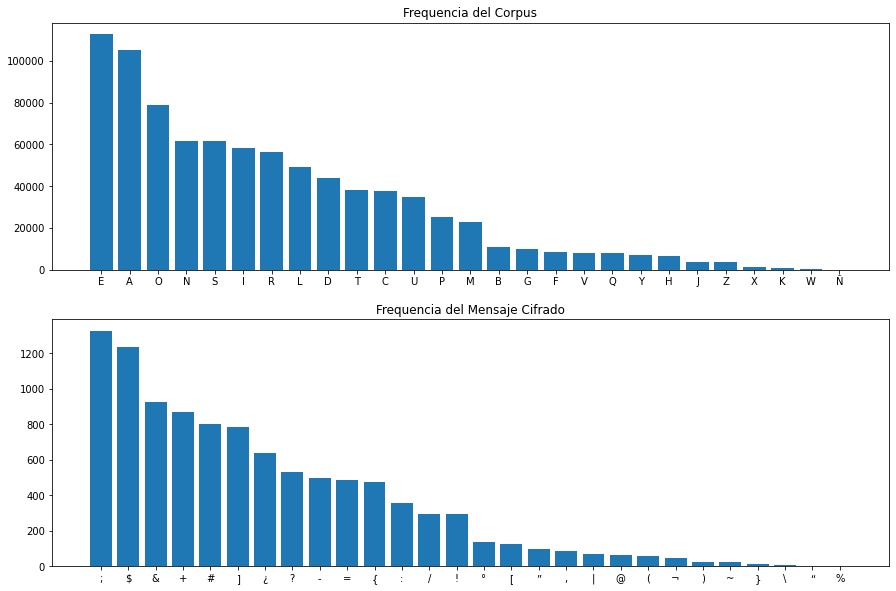

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.bar(corpus_dist["Symbol"],corpus_dist["Frequency"])
plt.title("Frequencia del Corpus")
plt.subplot(2,1,2)
plt.bar(cipher_dist["Symbol"],cipher_dist["Frequency"])
plt.title("Frequencia del Mensaje Cifrado")

Partiendo de la hipótesis anterior, el primer enfoque que tome fue concatenar las listas de ambos alfabetos (texto en español experimental y texto cifrado) y concatenarlos para crear un diccionario donde las llaves son el carácter cifrado y los valores son su presunto equivalente en el alfabeto latino. Dicha estructura de datos se usará para traducir directamente el texto cifrado. En principio, dado que se usan las listas ordenadas en orden descendente por frecuencia de aparición se puede esperar que algunos símbolos coincidan. Es poco probable que en el primer intento todos los símbolos están alineados. Sin embargo, es probable que las letras más comunes lo estén, y esto puede ayudar a revelar palabras que permitan deducir a alineación del resto del alfabeto.



In [28]:
corpus_symbols_sorted = list(corpus_dist["Symbol"])
cipher_symbols_sorted = list(cipher_dist["Symbol"][:-1])

In [29]:
print(len(corpus_symbols_sorted))
print(len(cipher_symbols_sorted))


27
27


In [30]:
traducer = dict(zip(cipher_symbols_sorted,corpus_symbols_sorted))

In [31]:
traducer

{';': 'E',
 '$': 'A',
 '&': 'O',
 '+': 'N',
 '#': 'S',
 ']': 'I',
 '¿': 'R',
 '?': 'L',
 '-': 'D',
 '=': 'T',
 '{': 'C',
 ':': 'U',
 '/': 'P',
 '!': 'M',
 '°': 'B',
 '[': 'G',
 '”': 'F',
 ',': 'V',
 '|': 'Q',
 '@': 'Y',
 '(': 'H',
 '¬': 'J',
 ')': 'Z',
 '~': 'X',
 '}': 'K',
 '\\': 'W',
 '“': 'Ñ'}

In [32]:
cipher_sentences

'$:#@:; #:;+-¿$+ °]?$+ +; °];¿&# ${-;¿$?$+ ;# ;{ ?&+ !]{ °;]#-; {$ ]#?:+-¿]$ ?; {$ =]”;¿+;[:¿]?$? °&{°]& =&# ,:;¿¬$ ;# ?&+ !]{ °;]#-]:#& !$#?]$#- $=;/-& ;{ ¿;-& ?; -¿$”$)$¿ ;# =]¿=:#+-$#=]$+ +];!/¿; =$!”]$#-;+ +]# ?;)$¿ ?; &,¿;=;¿ $ {&+ ={];#-;+ +;¿°]=]&+ ?; /¿]!;¿$ =${]?$? @:; +; $+&=]$# =&# #:;+-¿&+ ;~/;¿-&+ ;# =]”;¿+;[:¿]?$? {$+ ;~/;=-$-]°$+ +&# ,:#?$!;#-${;+ :#$ =&+$ =&# {$ @:; +];!/¿; /&?;!&+ =&#-$¿ ;+ ;{ #]°;{ ?; ]#=;¿-]?:!”¿; ;# ;{ $!”]-& =]”;¿#;-]=& {&+ $-$=$#-;+ =$!”]$# ¿;[:{$¿!;#-; +:+ -$=-]=$+ -;=#]=$+ | /¿&=;?]!];#-&+ /$¿$ ;°$?]¿ {$ ?;-;==]&# ?;)$#?& $ {&+ ?;,;#+&¿;+ {:=($#?& /$¿$ +;[:]¿ ;{ ¿]-!& =:$#?& !$#?]$#- $|:?$ $ ¿;?:=]¿ ;+$ “¿;=($ =&!/$¿-];#?& #:;+-¿&+ $/¿;#?]¬$);+ | ;~/;=-$-]°$+ ]#,&¿!$?&+ | ¿;+/${?$?&+ /&¿ /¿:;”$+ -$!”];# $°$#¬$!&+ ;# {$ !]+]&# ?; !$#?]$#- ($=;¿ @:; -&?$+ {$+ &¿[$#]¬$=]&#;+ ;+-;# +;[:¿$+ =&#-¿$ {$+ =]”;¿$!;#$¬$+ | =&#,];# ;# +: /¿;/$¿$=]&# ;{ ]#,&¿!; ?; ;+-; $%& =$-&¿=; /¿;?]==]&#;+ ?; =]”;¿+;[:¿]?$? /$¿$ ?&+ !]{ °;]#-]?&+ | !$+ ${{$ /¿;+;#-$ !$+ 

In [33]:
decoded = ""
for character in cipher_sentences:
  if character == " ":
    decoded += character
  else:
    try:
      decoded += traducer[character]
    except:
      continue

In [34]:
decoded

'AUSYUE SUENDRAN BILAN NE BIEROS ACDERALAN ES EC LON MIC BEISDE CA ISLUNDRIA LE CA TIFERNEGURILAL BOCBIO TOS VUERJA ES LON MIC BEISDIUSO MASLIASD ATEPDO EC REDO LE DRAFAZAR ES TIRTUSNDASTIAN NIEMPRE TAMFIASDEN NIS LEZAR LE OVRETER A CON TCIESDEN NERBITION LE PRIMERA TACILAL YUE NE ANOTIAS TOS SUENDRON EXPERDON ES TIFERNEGURILAL CAN EXPETDADIBAN NOS VUSLAMESDACEN USA TONA TOS CA YUE NIEMPRE POLEMON TOSDAR EN EC SIBEC LE ISTERDILUMFRE ES EC AMFIDO TIFERSEDITO CON ADATASDEN TAMFIAS REGUCARMESDE NUN DATDITAN DETSITAN Q PROTELIMIESDON PARA EBALIR CA LEDETTIOS LEZASLO A CON LEVESNOREN CUTHASLO PARA NEGUIR EC RIDMO TUASLO MASLIASD AQULA A RELUTIR ENA ÑRETHA TOMPARDIESLO SUENDRON APRESLIJAZEN Q EXPETDADIBAN ISVORMALON Q RENPACLALON POR PRUEFAN DAMFIES ABASJAMON ES CA MINIOS LE MASLIASD HATER YUE DOLAN CAN ORGASIJATIOSEN ENDES NEGURAN TOSDRA CAN TIFERAMESAJAN Q TOSVIES ES NU PREPARATIOS EC ISVORME LE ENDE AO TADORTE PRELITTIOSEN LE TIFERNEGURILAL PARA LON MIC BEISDILON Q MAN ACCA PRENESDA MAN L

Como se mencionó antes, no todo el alfabeto fue alineado en la primera iteración, sin embargo se pueden deducir el resto del alfabeto a través de algunas palabras, por ejemplo:
- AUSYUE -> AUNQUE 
- TIFERNEGURILAL -> CIBERSEGURIDAD 
- OPERATIOSEN -> OPERACIONES

In [35]:
traducer_update = {';': 'E',
                  '$': 'A',
                  '&': 'O',
                  '#': 'N',
                  '+': 'S',
                  ']': 'I',
                  '¿': 'R',
                  '{': 'L',
                  '?': 'D',
                  '-': 'T',
                  '=': 'C',
                  ':': 'U',
                  '/': 'P',
                  '!': 'M',
                  '”': 'B',
                  '[': 'G',
                  ',': 'F',
                  '°': 'V',
                  '@': 'Q',
                  '|': 'Y',
                  '(': 'H',
                  ')': 'J',
                  '¬': 'Z',
                  '~': 'X',
                  '\\': 'K',
                  '}': 'W',
                  '%': 'Ñ',
                  ' ': ' '
                  }

Después de aplicar las correcciones, se vuelve a correr el texto cifrado con el diccionario corregido y el mensaje es revelado:

In [36]:
def apply_update(cipher,traducer_updated):
  decoded_new = ""
  for character in cipher:
    try:
      decoded_new +=  traducer_updated[character]
    except:
      continue
  return decoded_new
      
    

In [37]:
decoded_update = apply_update(cipher_sentences,traducer_update)

In [38]:
decoded_update

'AUNQUE NUESTRAS VIDAS SE VIERON ALTERADAS EN EL DOS MIL VEINTE LA INDUSTRIA DE LA CIBERSEGURIDAD VOLVIO CON FUERZA EN DOS MIL VEINTIUNO MANDIANT ACEPTO EL RETO DE TRABAJAR EN CIRCUNSTANCIAS SIEMPRE CAMBIANTES SIN DEJAR DE OFRECER A LOS CLIENTES SERVICIOS DE PRIMERA CALIDAD QUE SE ASOCIAN CON NUESTROS EXPERTOS EN CIBERSEGURIDAD LAS EXPECTATIVAS SON FUNDAMENTALES UNA COSA CON LA QUE SIEMPRE PODEMOS CONTAR ES EL NIVEL DE INCERTIDUMBRE EN EL AMBITO CIBERNETICO LOS ATACANTES CAMBIAN REGULARMENTE SUS TACTICAS TECNICAS Y PROCEDIMIENTOS PARA EVADIR LA DETECCION DEJANDO A LOS DEFENSORES LUCHANDO PARA SEGUIR EL RITMO CUANDO MANDIANT AYUDA A REDUCIR ESA RECHA COMPARTIENDO NUESTROS APRENDIZAJES Y EXPECTATIVAS INFORMADOS Y RESPALDADOS POR PRUEBAS TAMBIEN AVANZAMOS EN LA MISION DE MANDIANT HACER QUE TODAS LAS ORGANIZACIONES ESTEN SEGURAS CONTRA LAS CIBERAMENAZAS Y CONFIEN EN SU PREPARACION EL INFORME DE ESTE AÑO CATORCE PREDICCIONES DE CIBERSEGURIDAD PARA DOS MIL VEINTIDOS Y MAS ALLA PRESENTA MAS D